In [192]:
import pandas as pd
import numpy as np
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
from plotly import tools
from plotly.graph_objs import Line, Marker
from collections import Counter
import plotly.graph_objs as go

In [193]:
inputDF = pd.read_csv('/Users/Macbook_FZN/Desktop/Data_Mining/Seattle_2019_Cleaned.csv',low_memory=False)

In [194]:
inputDF.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,reviews_per_month,date,available,price_y,adjusted_price,minimum_nights_y,maximum_nights_y,key,Mean_Sentiment_Polarity,Total_Reviews_per_listing
0,2318,https://www.airbnb.com/rooms/2318,20190117134415,2019-01-17,"Casa Madrona - Urban Oasis, 1 block from the P...","Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, (Phone number h...",none,Madrona is a hidden gem of a neighborhood. It ...,...,0.17,2019-01-17,f,$250.00,$250.00,4,300,2318$250.00,0.483347,21
1,2318,https://www.airbnb.com/rooms/2318,20190117134415,2019-01-17,"Casa Madrona - Urban Oasis, 1 block from the P...","Gorgeous, architect remodeled, 1917 Dutch Colo...","Casa Madrona is a gorgeous, architect remodele...","Gorgeous, architect remodeled, (Phone number h...",none,Madrona is a hidden gem of a neighborhood. It ...,...,0.17,2019-03-25,f,$315.00,$315.00,4,300,2318$315.00,0.483347,21
2,3335,https://www.airbnb.com/rooms/3335,20190117134415,2019-01-17,Sweet Seattle Urban Homestead 2 Bdr,Welcome! If you stay here you will be living i...,Welcome! Come enjoy your time in Seattle at a...,Welcome! If you stay here you will be living i...,none,This is a very diverse neighborhood with a var...,...,0.03,2019-01-17,f,$100.00,$100.00,2,730,3335$100.00,0.337037,1
3,5682,https://www.airbnb.com/rooms/5682,20190117134415,2019-01-17,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,...,4.30,2019-01-17,f,$49.00,$49.00,3,14,5682$49.00,0.353886,462
4,5682,https://www.airbnb.com/rooms/5682,20190117134415,2019-01-17,"Cozy Studio, min. to downtown -WiFi",The Cozy Studio is a perfect launchpad for you...,"Hello fellow travelers, Save some money and ha...",The Cozy Studio is a perfect launchpad for you...,none,NaN,...,4.30,2019-02-01,f,$50.00,$50.00,3,14,5682$50.00,0.353886,462


In [195]:
inputDF['price_y'] = inputDF['price_y'].str.replace(',', '')
inputDF['price_y'] = inputDF['price_y'].str.replace('$', '')
inputDF['price_y'] = inputDF['price_y'].astype(float)

In [196]:
inputDF['price_y'].dtype

dtype('float64')

In [197]:
# Categorizing and Visualizing differernt listings based on room_type


roomType_DF=inputDF.groupby('room_type').id.count()
roomType_DF=roomType_DF.reset_index()
roomType_DF=roomType_DF.rename(columns={'id':'number_Of_Listings'})
roomType_DF


trace_room_type = go.Bar(x=roomType_DF.room_type, y=roomType_DF.number_Of_Listings,
                         text=roomType_DF.number_Of_Listings,
                         textposition = 'auto',
    marker=dict(
        color=(['rgba(222,45,38,0.8)',
               'rgba(204,204,204,1)', 'rgba(204,204,204,1)',
               ]),
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    
               )

layout= dict(
    title='<b>Room Type Distribution</b>',
    xaxis=dict(
        title='Room_Type',
        color='#7f7f7f',
        
        ),
    yaxis2=dict(
        title='Number_Of_Listings',
        color='#7f7f7f',
        
        )
    
)

data=[trace_room_type]
fig = dict( data=data, layout=layout )
py.iplot(fig)

In [199]:
# Analyzing and plotting the number of listings based on their property type

propertytype_DF = inputDF.groupby('property_type').id.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'id':'number_Of_Listings'})

trace_property_type = go.Bar(x=propertytype_DF.property_type, y=propertytype_DF.number_Of_Listings,
                         text=propertytype_DF.number_Of_Listings,
                         textposition = 'auto',
    marker=dict(
#         color=([
#                'rgba(204,204,204,1)','rgba(222,45,38,0.8)', 'rgba(204,204,204,1)',
#                ]),
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    
               )

layout= dict(
    title='<b>Property Type Distribution</b>',
    xaxis=dict(
        title='Property_Type',
        color='#7f7f7f',
        categoryorder= 'array',
        categoryarray= [x for _, x in sorted(zip(propertytype_DF.number_Of_Listings, propertytype_DF.property_type))]
        
        ),
    yaxis2=dict(
        title='Number_Of_Listings',
        color='#7f7f7f',
        
        )
    
)

data=[trace_property_type]
fig = dict( data=data, layout=layout )
py.iplot(fig)


**We can see that people list their entire apartments rather than private or shared rooms. Property type also plays an importnat factor. Most of the airbnb in seattle areas are Apartment & House which is not surprising ,although there are some other type of property also like serviced apartment , villa townhouse and Guest suite.**


In [96]:
# analyzing the prices for different room type and property type

roomProperty_DF = inputDF.groupby(['property_type','room_type']).price_y.mean()
roomProperty_DF = roomProperty_DF.reset_index()
roomProperty_DF=roomProperty_DF.sort_values('price_y',ascending=[0])
roomProperty_DF.head()

,property_type,room_type,price_y
51,Villa,Entire home/apt,586.000000
10,Boutique hotel,Private room,515.000000
48,Townhouse,Entire home/apt,309.425318
30,House,Entire home/apt,296.734056
33,Houseboat,Entire home/apt,272.383673


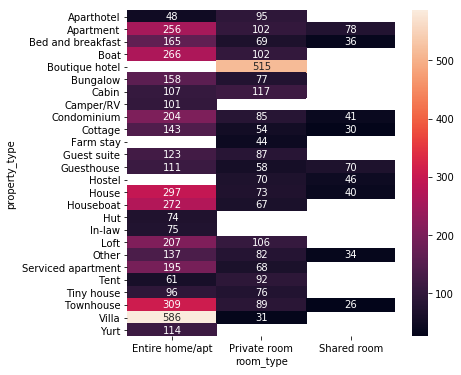

In [100]:
#plotting heatmap mean price for a room and a property type

import seaborn as sns
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
sns.heatmap(inputDF.groupby([
        'property_type', 'room_type']).price_y.mean().unstack(),annot=True, fmt=".0f")

**From the above heatmap we can clearly see that the price for Entire Home/Apartment is maximum for almost of all the property_type.From this we can infer that room type and property type plays an important role in price of an airbnb listing.**

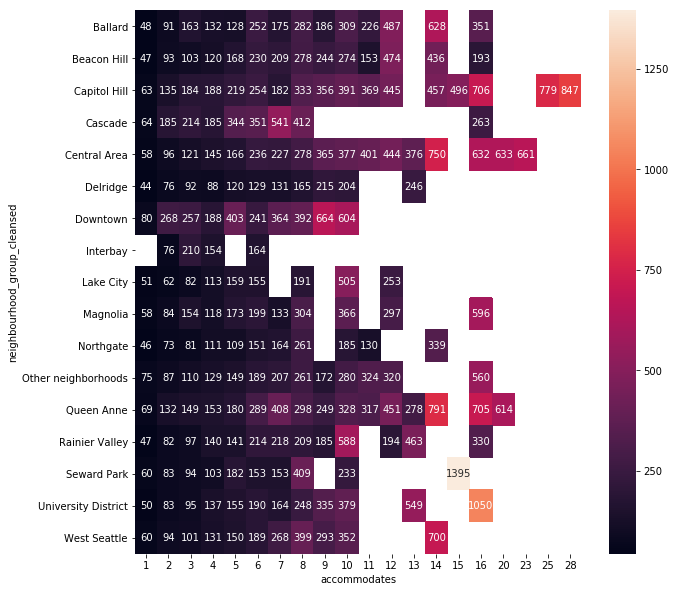

In [202]:
# HeatMap for variation of prices with number of bedrooms for listings

plt.figure(figsize=(10,10))
sns.heatmap(inputDF.groupby([
        'neighbourhood_group_cleansed', 'accommodates']).price_y.mean().unstack(),annot=True, fmt=".0f")

In [203]:
neighbourhoodPrice_DF=inputDF.groupby('neighbourhood_group_cleansed').price_y.mean()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.reset_index()
neighbourhoodPrice_DF=neighbourhoodPrice_DF.rename(columns={'price_y':'Average_Price'})
neighbourhoodPrice_DF=neighbourhoodPrice_DF.sort_values('Average_Price',ascending=[0])
neighbourhoodPrice_DF.head()


trace_room_type = go.Bar(x=neighbourhoodPrice_DF.neighbourhood_group_cleansed, y=neighbourhoodPrice_DF.Average_Price,
#                          text=roomType_DF.number_Of_Listings,
#                          textposition = 'auto',
    marker=dict(
        color=(['rgba(222,45,38,0.8)',
               'rgba(204,204,204,1)', 'rgba(204,204,204,1)',
               ]),
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    
               )

layout= dict(
    title='<b>Neighbourhood Distribution In Seattle</b>',
    xaxis=dict(
        title='Neighbourhood',
        color='#7f7f7f',
        
        ),
    yaxis=dict(
        title='Price',
        color='#7f7f7f',
        
        )
    
)

data=[trace_room_type]
fig = dict( data=data, layout=layout )
py.iplot(fig)



**Above graph and heatmap clearly shows that with increase in number of bedrooms price increases and in addition to this "neighbourhood" is also an important factor in deciding the price of a lisiting.**

In [ ]:
# Analyzing and plotting the number of listings based on their property type

propertytype_DF = inputDF.groupby('property_type').id.count()
propertytype_DF= propertytype_DF.reset_index()
propertytype_DF=propertytype_DF.rename(columns={'id':'number_Of_Listings'})

trace_property_type = go.Bar(x=propertytype_DF.property_type, y=propertytype_DF.number_Of_Listings,
                         text=propertytype_DF.number_Of_Listings,
                         textposition = 'auto',
    marker=dict(
#         color=([
#                'rgba(204,204,204,1)','rgba(222,45,38,0.8)', 'rgba(204,204,204,1)',
#                ]),
        line=dict(
            color='rgb(8,48,107)',
            width=1.5),
        ),
    
               )

layout= dict(
    title='<b>Property Type Distribution</b>',
    xaxis=dict(
        title='Property_Type',
        color='#7f7f7f',
        categoryorder= 'array',
        categoryarray= [x for _, x in sorted(zip(propertytype_DF.number_Of_Listings, propertytype_DF.property_type))]
        
        ),
    yaxis2=dict(
        title='Number_Of_Listings',
        color='#7f7f7f',
        
        )
    
)

data=[trace_property_type]
fig = dict( data=data, layout=layout )
py.iplot(fig)